<a href="https://colab.research.google.com/github/Vaishali021103/Exp10_AIDS/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas tensorflow matplotlib scikit-learn

In [6]:
import pandas as pd

# Load the dataset, specifying the encoding as 'latin-1'
data = pd.read_csv("sales_data_sample.csv", encoding='latin-1')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Handle categorical variables (if any)
label_encoder = LabelEncoder()
data['PRODUCTLINE'] = label_encoder.fit_transform(data['PRODUCTLINE'])
data['STATUS'] = label_encoder.fit_transform(data['STATUS'])
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])

# Select features and target variable
features = ['QUANTITYORDERED', 'PRICEEACH', 'PRODUCTLINE', 'STATUS', 'ORDERDATE', 'YEAR_ID']
target = 'SALES'

# Convert ORDERDATE to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['ORDERDATE'] = data['ORDERDATE'].dt.dayofyear  # Convert to a numerical format

# Splitting the dataset into features and target
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for sales prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15008070.0000 - val_loss: 15252281.0000
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15659560.0000 - val_loss: 15027304.0000
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15158057.0000 - val_loss: 14365558.0000
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14292979.0000 - val_loss: 13050757.0000
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13222832.0000 - val_loss: 11013887.0000
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11479624.0000 - val_loss: 8529208.0000
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8069606.0000 - val_loss: 6077188.5000
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5892073.5000 - val_loss: 4182675.2500
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3933187.2500 - val_loss: 3163227.0000
Epoch 10/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3166761.0000 - val_loss: 2752683.0000
Epoch 11/100
57/57

In [10]:
# Make predictions
predicted_sales = model.predict(X_test_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


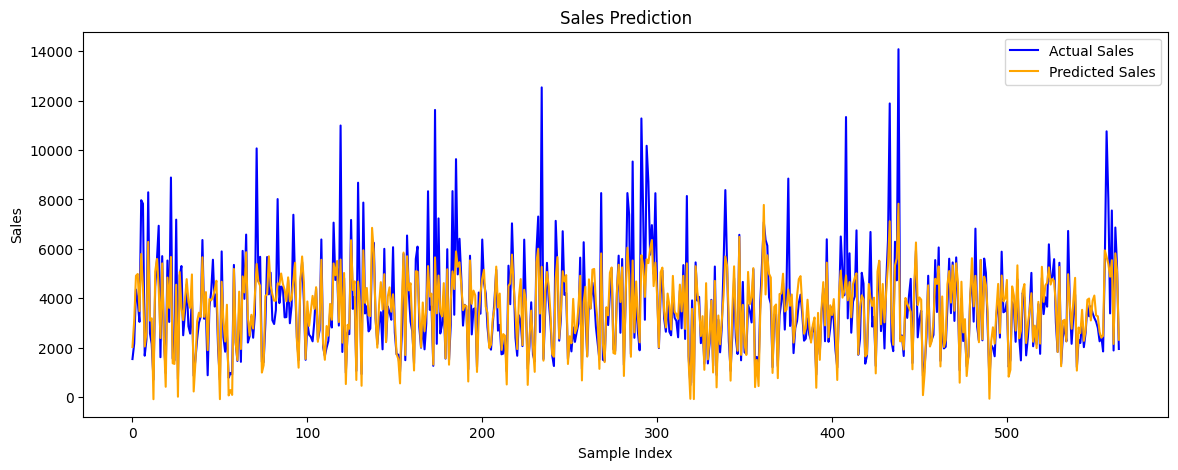

In [11]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(predicted_sales, label='Predicted Sales', color='orange')
plt.title('Sales Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
